#  WMAZE Beta Series Correlation Analysis

## Obtains correlation values for the regions of interest:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal caudate (hand-drawn by Mandy)
### Medial PFC (FS labels: rostral anterior cingulate [1026,1014] & medial orbitofrontal [2026,2155])
### Dorsolateral PFC (Lausanne atlas: dlPFC)

### Use Glob to grab all previously created anatomy masks and beta series cope files

In [1]:
from glob import glob

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

for SID in sids:
    # Grab the mask files for each subject
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/mask/anat_masks/_subject_id_' + SID + '/_anatmask_xfm0/*')
    mask_filenames.append(sorted(mask_filenames_glob))
    # Grab the cope files for each subject
    subjcopes_glob = glob(proj_dir + '/frstlvl/wmaze_MRthesis/fixed_before_conditional/modelLSS_MR_drop2/merge_copes2/'
                          + SID + '/merged/cope_*')
    cope_files.append(sorted(subjcopes_glob))
    # If there are no cope files, print subject id
    if len(cope_files[-1]) == 0:
        print(SID)

### Cell to double-check the array indexing for both the masks and the copes

In [2]:
print '0. left dpPFC'
print(mask_filenames[0][0]) #lh-dlPFC
print""
print '1. left hippocampus'
print(mask_filenames[0][1]) #lh-hippocampus
print""
print '2. left mPFC'
print(mask_filenames[0][2]) #lh-mPFC
print""
print '3. left putamen'
print(mask_filenames[0][3]) #lh-putamen
print""
print '4. left caudate'
print(mask_filenames[0][4]) #lh-caudate
print""
print '5. right dlPFC Lausanne'
print(mask_filenames[0][5]) #rh-dlPFC Lausanne
print""
print '6. right hippocampus'
print(mask_filenames[0][6]) #rh-hippocampus
print""
print '7. right mPFC'
print(mask_filenames[0][7]) #rh-mPFC
print""
print '8. right putamen'
print(mask_filenames[0][8]) #rh-putamen
print""
print '9. right caudate'
print(mask_filenames[0][9]) #rh-caudate
print""

print '-----'

print 'cope_corr'
print(cope_files[0][0]) #cope_corr
print ""
print 'cope_incorr'
print(cope_files[0][1]) #cope_incorr

#for i in cope_files:
#    print(len(i))


0. left dpPFC
/home/data/madlab/data/mri/wmaze/roi_analysis/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-dlPFC_lausanne_warped.nii.gz

1. left hippocampus
/home/data/madlab/data/mri/wmaze/roi_analysis/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-hippocampus_warped.nii.gz

2. left mPFC
/home/data/madlab/data/mri/wmaze/roi_analysis/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-mPFC_warped.nii.gz

3. left putamen
/home/data/madlab/data/mri/wmaze/roi_analysis/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-putamen_warped.nii.gz

4. left caudate
/home/data/madlab/data/mri/wmaze/roi_analysis/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh_caudate_anat_mask_warped.nii.gz

5. right dlPFC Lausanne
/home/data/madlab/data/mri/wmaze/roi_analysis/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/rh-dlPFC_lausanne_warped.nii.gz

6. right hippocampus
/home/data/madlab/data/mri/wmaze/roi_analysis/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/rh

### Use binarized mask to obtain activation in left & right hemisphere for each ROI

In [3]:
import nibabel as nb
import pandas as pd
import numpy as np
from scipy import stats


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lh_hp_corr':[], 'rh_hp_corr':[], 
            'lh_hp_incorr':[], 'rh_hp_incorr':[],                 
            'lh_caudate_corr':[], 'rh_caudate_corr':[], 
            'lh_caudate_incorr':[], 'rh_caudate_incorr':[],  
            'lh_dlPFC_corr':[], 'rh_dlPFC_corr':[], 
            'lh_dlPFC_incorr':[], 'rh_dlPFC_incorr':[],            
            'lh_mPFC_corr':[], 'rh_mPFC_corr':[], 
            'lh_mPFC_incorr':[], 'rh_mPFC_incorr':[]}

corr_matrix = np.zeros((len(sids), 5))

# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][1])
    rh_hp_img = nb.load(mask_filenames[i][6])
    
    lh_caudate_img = nb.load(mask_filenames[i][4])
    rh_caudate_img = nb.load(mask_filenames[i][9])
    
    lh_dlPFC_img = nb.load(mask_filenames[i][0])
    rh_dlPFC_img = nb.load(mask_filenames[i][5])
    
    lh_mPFC_img = nb.load(mask_filenames[i][2])
    rh_mPFC_img = nb.load(mask_filenames[i][7])
    
    #Load copes for corr vs incorr betas
    cope_corr_img = nb.load(cope_files[i][0])
    cope_incorr_img = nb.load(cope_files[i][1])
     
  
    ########################
    ### Left Hippocampus ###
    ########################
    
    # cope_corr
    lh_hp_corr_data = cope_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lh_hp_corr'].append(lh_hp_corr_data[0:-1])
    
    # cope_incorr
    lh_hp_incorr_data = cope_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lh_hp_incorr'].append(lh_hp_incorr_data[0:-1])
    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # cope_corr
    rh_hp_corr_data = cope_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rh_hp_corr'].append(rh_hp_corr_data[0:-1])

    # cope_incorr
    rh_hp_incorr_data = cope_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rh_hp_incorr'].append(rh_hp_incorr_data[0:-1])
    
    #####################
    ### Left Caudate ###
    ##################### 
    
    # cope_corr
    lh_caudate_corr_data = cope_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lh_caudate_corr'].append(lh_caudate_corr_data[0:-1])

    # cope_incorr
    lh_caudate_incorr_data = cope_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lh_caudate_incorr'].append(lh_caudate_incorr_data[0:-1])
    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # cope_corr
    rh_caudate_corr_data = cope_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rh_caudate_corr'].append(rh_caudate_corr_data[0:-1])

    # cope_incorr
    rh_caudate_incorr_data = cope_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rh_caudate_incorr'].append(rh_caudate_incorr_data[0:-1])  
    
    ####################
    #### Left mPFC #####
    ####################
    
    # cope_corr
    lh_mPFC_corr_data = cope_corr_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lh_mPFC_corr'].append(lh_mPFC_corr_data[0:-1])
    
    # cope_incorr
    lh_mPFC_incorr_data = cope_incorr_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lh_mPFC_incorr'].append(lh_mPFC_incorr_data[0:-1])    
    
    #####################
    #### Right mPFC #####
    #####################
    
    # cope_corr
    rh_mPFC_corr_data = cope_corr_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rh_mPFC_corr'].append(rh_mPFC_corr_data[0:-1])

    # cope_incorr
    rh_mPFC_incorr_data = cope_incorr_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rh_mPFC_incorr'].append(rh_mPFC_incorr_data[0:-1]) 
    
    ####################
    #### Left dlPFC ####
    ####################
    
    # cope_corr
    lh_dlPFC_corr_data = cope_corr_img.get_data()[lh_dlPFC_img.get_data() > 0.]
    all_data['lh_dlPFC_corr'].append(lh_dlPFC_corr_data[0:-1])
    
    # cope_incorr
    lh_dlPFC_incorr_data = cope_incorr_img.get_data()[lh_dlPFC_img.get_data() > 0.]
    all_data['lh_dlPFC_incorr'].append(lh_dlPFC_incorr_data[0:-1])  
    
    #####################
    ### Right dlPFC ###
    #####################
    
    # cope_corr
    rh_dlPFC_corr_data = cope_corr_img.get_data()[rh_dlPFC_img.get_data() > 0.]
    all_data['rh_dlPFC_corr'].append(rh_dlPFC_corr_data[0:-1])

    # cope_incorr
    rh_dlPFC_incorr_data = cope_incorr_img.get_data()[rh_dlPFC_img.get_data() > 0.]
    all_data['rh_dlPFC_incorr'].append(rh_dlPFC_incorr_data[0:-1])
    
    
    all_keys = ['lh_hp_corr', 'rh_hp_corr', 
                'lh_hp_incorr', 'rh_hp_incorr',                 
                'lh_caudate_corr', 'rh_caudate_corr', 
                'lh_caudate_incorr', 'rh_caudate_incorr',  
                'lh_dlPFC_corr', 'rh_dlPFC_corr', 
                'lh_dlPFC_incorr', 'rh_dlPFC_incorr',            
                'lh_mPFC_corr', 'rh_mPFC_corr', 
                'lh_mPFC_incorr', 'rh_mPFC_incorr']
    
    for key in all_keys: 
        # averaging each column for only the current participant 
        all_data[key][-1] = np.mean(all_data[key][-1], axis = 0)
       
    #Combined Hippocampus average for corr and incorr for current sub
    all_data['hp_corr'] = (np.array(all_data['lh_hp_corr'][-1]) + np.array(all_data['rh_hp_corr'][-1]))/2.
    all_data['hp_incorr'] = (np.array(all_data['lh_hp_incorr'][-1]) + np.array(all_data['rh_hp_incorr'][-1]))/2.
                             
    #Combined Caudate average for corr and incorr for current sub
    all_data['caudate_corr'] = (np.array(all_data['lh_caudate_corr'][-1]) + np.array(all_data['rh_caudate_corr'][-1]))/2.
    all_data['caudate_incorr'] = (np.array(all_data['lh_caudate_incorr'][-1]) + np.array(all_data['rh_caudate_incorr'][-1]))/2.

    # Combined mPFC average for corr and incorr for current sub
    all_data['mPFC_corr'] = (np.array(all_data['lh_mPFC_corr'][-1]) + np.array(all_data['rh_mPFC_corr'][-1]))/2.
    all_data['mPFC_incorr'] = (np.array(all_data['lh_mPFC_incorr'][-1]) + np.array(all_data['rh_mPFC_incorr'][-1]))/2.

    #Combined dlPFC average for corr and incorr for current sub
    all_data['dlPFC_corr'] = (np.array(all_data['lh_dlPFC_corr'][-1]) + np.array(all_data['rh_dlPFC_corr'][-1]))/2.
    all_data['dlPFC_incorr'] = (np.array(all_data['lh_dlPFC_incorr'][-1]) + np.array(all_data['rh_dlPFC_incorr'][-1]))/2.   
   
    
    # Creation of the correlation matrix (with subject id column)
    corr_matrix[i][0] = float(sids[i][-3:])
    corr_matrix[i][1] = stats.pearsonr(all_data['hp_corr'], all_data['mPFC_corr'])[0]
    corr_matrix[i][2] = stats.pearsonr(all_data['hp_incorr'], all_data['mPFC_incorr'])[0]
    corr_matrix[i][3] = stats.pearsonr(all_data['caudate_corr'], all_data['dlPFC_corr'])[0]
    corr_matrix[i][4] = stats.pearsonr(all_data['caudate_incorr'], all_data['dlPFC_incorr'])[0]
    
    
    '''
    print i
    print 'Hippocampus & mPFC Correct'
    print stats.pearsonr(all_data['hp_corr'], all_data['mPFC_corr'])
    avg_HPC_corr_cope_data = all_data['hp_corr']
    avg_mPFC_corr_cope_data = all_data['mPFC_corr']
    corrcoef_HPC_mPFC_corr_copes = np.corrcoef(avg_HPC_corr_cope_data, avg_mPFC_corr_cope_data)
    print corrcoef_HPC_mPFC_corr_copes
    '''

##  Non-normalized correlation matrix for beta series

In [4]:
import pandas as pd
corr_chart = {}
corr_chart['HPC-mPFC_corr'] = corr_matrix[:, 1] #hpc-mpfc corr
corr_chart['HPC-mPFC_incorr'] = corr_matrix[:, 2] #hpc-mpfc incorr
corr_chart['Caudate-dlPFC_corr'] = corr_matrix[:, 3] #caudate-dlpfc corr
corr_chart['Caudate-dlPFC_incorr'] = corr_matrix[:, 4] #caudate-dlpfc incorr
corr_chart_df = pd.DataFrame.from_dict(corr_chart)

In [5]:
corr_chart_df

,Caudate-dlPFC_corr,Caudate-dlPFC_incorr,HPC-mPFC_corr,HPC-mPFC_incorr
0,0.521362,0.183785,0.533536,0.247581
1,0.722604,0.738373,0.715419,0.883383
2,0.752560,0.717147,0.777530,0.646645
3,0.649843,0.293428,0.726411,0.469794
4,0.235956,0.530479,0.740164,0.806460
5,0.753912,0.767327,0.640708,0.640700
6,0.861590,0.867800,0.627587,0.669733
7,0.326771,0.215668,0.303237,0.311290
8,0.572983,0.633084,0.624061,0.525316
9,0.418134,0.227904,0.601568,0.727356


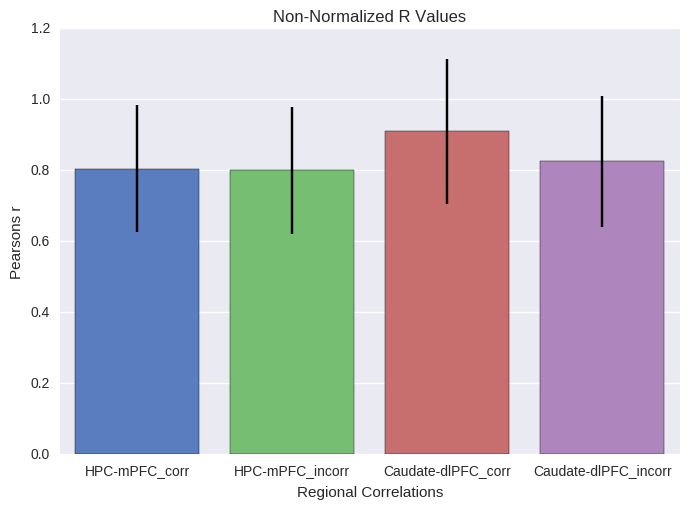

In [6]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt

N = 4
conditions = ['HPC-mPFC_corr', 'HPC-mPFC_incorr', 'Caudate-dlPFC_corr', 'Caudate-dlPFC_incorr']
means_allsubjs = [np.average(corr_matrix[i][1]), 
                  np.average(corr_matrix[i][2]),
                  np.average(corr_matrix[i][3]), 
                  np.average(corr_matrix[i][4])]
sem_allsubjs = [np.average(corr_matrix[i][1]/(np.sqrt(len(sids)))), 
                np.average(corr_matrix[i][2]/(np.sqrt(len(sids)))),
                np.average(corr_matrix[i][3]/(np.sqrt(len(sids)))), 
                np.average(corr_matrix[i][4]/(np.sqrt(len(sids))))]


ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black')

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
#ax.set_ylim(0,1)
ax.set_ylabel("Pearsons r")
ax.set_xlabel("Regional Correlations")
ax.set_title("Non-Normalized R Values")
plt.show()

## Normalized correlation matrix for beta series

In [7]:
# Use Numpy's arctangent function to normalize correlations
norm_corr = np.arctanh(corr_matrix[:, 1:])
#print(norm_corr)

In [8]:
import pandas as pd
norm_chart = {}
norm_chart['HPC-mPFC_corr'] = norm_corr[:, 0] #hpc-mpfc corr
norm_chart['HPC-mPFC_incorr'] = norm_corr[:, 1] #hpc-mpfc incorr
norm_chart['Caudate-dlPFC_corr'] = norm_corr[:, 2] #caudate-dlpfc corr
norm_chart['Caudate-dlPFC_incorr'] = norm_corr[:, 3] #caudate-dlpfc incorr
norm_chart_df = pd.DataFrame.from_dict(norm_chart)

In [9]:
norm_chart_df

,Caudate-dlPFC_corr,Caudate-dlPFC_incorr,HPC-mPFC_corr,HPC-mPFC_incorr
0,0.578208,0.185897,0.595076,0.252835
1,0.913073,0.946892,0.898197,1.390966
2,0.978833,0.901746,1.039094,0.769511
3,0.775026,0.302313,0.921086,0.509806
4,0.240487,0.590812,0.950842,1.116819
5,0.981958,1.013794,0.759374,0.759361
6,1.299483,1.324102,0.737425,0.810260
7,0.339209,0.219109,0.313081,0.321973
8,0.651953,0.746546,0.731629,0.583654
9,0.445428,0.231977,0.695601,0.923090


### Descriptive Statistics

In [10]:
print "Mean: HPC-mPFC_corr"
print np.average(norm_corr[:, 0])
print "SD: HPC-mPFC_corr"
print np.std(norm_corr[:, 0])
print ""
print "Mean: HPC-mPFC_incorr"
print np.average(norm_corr[:, 1])
print "SD: HPC-mPFC_incorr"
print np.std(norm_corr[:, 1])
print ""
print "Mean: Caudate-dlPFC_corr"
print np.average(norm_corr[:, 2])
print "SD: Caudate-dlPFC_corr"
print np.std(norm_corr[:, 2])
print ""
print "Mean: Caudate-dlPFC_incorr"
print np.average(norm_corr[:, 3])
print "SD: Caudate-dlPFC_incorr"
print np.std(norm_corr[:, 3])

Mean: HPC-mPFC_corr
0.746977404533
SD: HPC-mPFC_corr
0.185738575203

Mean: HPC-mPFC_incorr
0.761965234486
SD: HPC-mPFC_incorr
0.315022185114

Mean: Caudate-dlPFC_corr
0.730372987548
SD: Caudate-dlPFC_corr
0.311377403453

Mean: Caudate-dlPFC_incorr
0.648010417061
SD: Caudate-dlPFC_incorr
0.367875285745


### Inferential Statistics

In [11]:
print 'T-test: HPC-mPFC_corr vs. HPC-mPFC_incorr'
print stats.ttest_rel(norm_corr[:, 0], norm_corr[:, 1])
print ""

print 'T-test: Caudate-dlPFC_corr vs. Caudate-dlPFC_incorr'
print stats.ttest_rel(norm_corr[:, 2], norm_corr[:, 3])
print ""

print "Bonferroni correction"
print '0.05/2 = 0.025'

T-test: HPC-mPFC_corr vs. HPC-mPFC_incorr
Ttest_relResult(statistic=-0.23966895183718448, pvalue=0.81315347236516711)

T-test: Caudate-dlPFC_corr vs. Caudate-dlPFC_incorr
Ttest_relResult(statistic=1.5837698414474115, pvalue=0.12974960379193276)

Bonferroni correction
0.05/2 = 0.025


In [ ]:
# Checked the indexing on the masks -- correct
# Checked the locations of the masks in functional space -- correct